In [88]:
#03/18/2018
#Libraries import
import nltk, re
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from collections import Counter
from nltk import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize as WordTokenizer
from collections import OrderedDict
from nltk import FreqDist
from string import punctuation
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
%matplotlib inline


In [2]:
#upload the data and rename the columns + drop missing values
data = pd.read_csv("C:\\Users\\Roaa Abuluka\\Desktop\\facebook9300.csv")
data = data.rename(columns = {'status_message': 'text'})
data.dropna( how = 'all' )
data = data[~data['text'].isnull()]
data.head()

,status_id,text,status_author,link_name,status_type,status_link,permalink_url,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,563451290370106_1571798056202086,داير تسكن فاخر وكمان بالاقساط وعبر شركه ما سم...,Salwa Badi,NaN,status,NaN,https://www.facebook.com/groups/56345129037010...,2018-03-12 03:31:51,1213,2036,13,1193,11,2,7,0,0
1,563451290370106_1574914135890478,دهب عيار21 بحريني \nثلاث دبل وغويشتين وسلسل \n...,عبد الله احمد الشنقيطي,NaN,status,NaN,https://www.facebook.com/groups/56345129037010...,2018-03-15 04:44:26,43,32,0,43,0,0,0,0,0
2,563451290370106_1574324582616100,السلام عليكم ورحمة الله تعالى وبركاته \nبسئل م...,ابو مهند عمر,NaN,status,NaN,https://www.facebook.com/groups/56345129037010...,2018-03-14 12:54:01,5,4,0,5,0,0,0,0,0
3,563451290370106_1574982992550259,عايزه لى نص بيت ايجار بسعر حنين ياخ\nمن بحرى ل...,إشراقة ادم محمد مخاوي,NaN,status,NaN,https://www.facebook.com/groups/56345129037010...,2018-03-15 06:19:20,9,7,0,9,0,0,0,0,0
4,563451290370106_1574975472551011,سلام عليكم\nبستفسر بخصوص الارتدادات فى السودان...,Mohammed Ali,NaN,status,NaN,https://www.facebook.com/groups/56345129037010...,2018-03-15 06:08:54,4,4,0,4,0,0,0,0,0


In [3]:
#function to remove the stop-words from the dataset
def stopwordRemove(text):
    ar_stopword_list = open("C:\\Users\\Roaa Abuluka\\Documents\\stopwords.txt", "r")
    stop_words = ar_stopword_list.read().split('\n')
    needed_words = []
    words = word_tokenize(text)
    for w in words:
        if w not in (stop_words):
            needed_words.append(w)
    filtered_sentence = " ".join(needed_words)
    return filtered_sentence

In [4]:
# Function for tokanize the sentence and remove punctuation  
def tokenizer(text):
        tokens_ = [word_tokenize(sent) for sent in sent_tokenize(text)]     
        tokens = []
        for token_by_sent in tokens_:
            tokens += token_by_sent
            
        tokens = list(filter(lambda t:t not in punctuation, tokens))
        filtered_tokens = []
        for token in tokens:
                filtered_tokens.append(token)
        return filtered_tokens

In [5]:
data['tokens'] = data['text'].fillna("").map(tokenizer)

In [6]:
#count the most common words 
def get_keywords(tokens,num):
    return Counter(tokens).most_common(num)

In [7]:
#show the tokens column 
for tokens in zip( data['tokens'].head(5)):
    print('tokens:', tokens)
    print() 

tokens: (['داير', 'تسكن', 'فاخر', 'وكمان', 'بالاقساط', 'وعبر', 'شركه', 'ما', 'سمسا', 'ر', 'وما', 'بناخد', 'منك', 'عموله', 'قول', 'انا', 'مهتم'],)

tokens: (['دهب', 'عيار21', 'بحريني', 'ثلاث', 'دبل', 'وغويشتين', 'وسلسل', 'السعر', '1300', 'جنيه', 'السعر', 'نهائي', 'ملحوظه', 'سعر', 'السوق', '1500', 'جنيه', 'للتواصل0924634655'],)

tokens: (['السلام', 'عليكم', 'ورحمة', 'الله', 'تعالى', 'وبركاته', 'بسئل', 'من', 'إسكان', 'الفتح', 'أم', 'درمان', 'الأسعار', 'في', 'حدود', 'كم', 'وأنا', 'جادي'],)

tokens: (['عايزه', 'لى', 'نص', 'بيت', 'ايجار', 'بسعر', 'حنين', 'ياخ', 'من', 'بحرى', 'لحدى', 'الحلفايه'],)

tokens: (['سلام', 'عليكم', 'بستفسر', 'بخصوص', 'الارتدادات', 'فى', 'السودان', 'بالنسبه', 'للجار', 'من', 'الجهه', 'الجنوبيه', 'والغربيه', 'لقطعه', 'ناصيه'],)



In [8]:
#create data frame of keywords
keywords_array=[]
for index, row in data.iterrows():
    keywords=row['tokens']
    for kw in keywords:
        keywords_array.append((kw.strip(' '), row['tokens']))
kw_df = pd.DataFrame(keywords_array).rename(columns={0:'keyword', 1:'keywords'})


In [ ]:
#build a co-occurance matrix 
document = kw_df.keywords.tolist()
names = kw_df.keyword.tolist()
 
document_array = []
for item in document:
    
    document_array.append((item))
    
occurrences = OrderedDict((name, OrderedDict((name, 0) for name in names)) for name in names)
 
#Find the co-occurrences:
for l in document_array:
    for i in range(len(l)):
        for item in l[:i] + l[i + 1:]:
            occurrences[l[i]][item] += 1

co_occur = pd.DataFrame.from_dict(occurrences )

In [ ]:
#co_occur file for futrther analysis 
co_occur.to_csv('out/ericbrown_co-occurancy_matrix.csv')

In [9]:
#function to count tokens in the text
def keywords(text):
    tokens = [word_tokenize(text)]
    alltokens = []      
    for token_list in tokens:
        alltokens += token_list
    counter = Counter(alltokens)
    return counter

In [10]:
dat= data['text'].fillna("").map(keywords)


In [12]:
#tfidf vectorization 
vectorizer = TfidfVectorizer(min_df=10, max_features=10000, tokenizer=tokenizer, ngram_range=(1, 2))
vz = vectorizer.fit_transform(list(data['text']))

In [13]:
tfidf = dict(zip(vectorizer.get_feature_names(), vectorizer.idf_))
tfidf = pd.DataFrame(columns=['tfidf']).from_dict(dict(tfidf), orient='index')
tfidf.columns = ['tfidf']

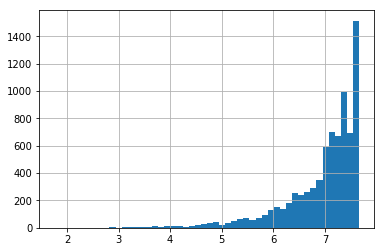

In [14]:
#distribution of the tfidf scores
tfidf.tfidf.hist(bins=50)


In [15]:
tfidf.sort_values(by=['tfidf'], ascending=True).head(5)

,tfidf
في,1.760943
من,2.180082
مطلوب,2.412840
مربع,2.468902
للبيع,2.613404


In [16]:
tfidf.sort_values(by=['tfidf'], ascending=False).head(5)

,tfidf
🚨عرض خااااااص,7.660342
سيتي,7.660342
شروط,7.660342
شركة ،,7.660342
82,7.660342
